# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.
C:\Users\Aaron\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Aaron\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Aaron\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Aaron\AppData\Roa

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = 0.95


In [7]:
# optimizers.SGD
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with LR = 0.100000


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Tr

Epoch 3/30
50000/50000 [==============================] - 17s 349us/step - loss: 1.5026 - acc: 0.4641 - val_loss: 1.4855 - val_acc: 0.4688
Epoch 4/30
50000/50000 [==============================] - 13s 259us/step - loss: 1.4411 - acc: 0.4858 - val_loss: 1.6179 - val_acc: 0.4293
Epoch 5/30
50000/50000 [==============================] - 6s 127us/step - loss: 1.4000 - acc: 0.5031 - val_loss: 1.5089 - val_acc: 0.4616
Epoch 6/30
50000/50000 [==============================] - 6s 119us/step - loss: 1.3542 - acc: 0.5187 - val_loss: 1.4660 - val_acc: 0.4800
Epoch 7/30
50000/50000 [==============================] - 6s 116us/step - loss: 1.3218 - acc: 0.5306 - val_loss: 1.4428 - val_acc: 0.4918
Epoch 8/30
50000/50000 [==============================] - 6s 113us/step - loss: 1.2804 - acc: 0.5442 - val_loss: 1.4030 - val_acc: 0.5063
Epoch 9/30
50000/50000 [==============================] - 6s 111us/step - loss: 1.2543 - acc: 0.5527 - val_loss: 1.4760 - val_acc: 0.4845
Epoch 10/30
50000/50000 [=======

50000/50000 [==============================] - 5s 109us/step - loss: 1.1937 - acc: 0.5803 - val_loss: 1.3632 - val_acc: 0.5197
Epoch 25/30
50000/50000 [==============================] - 17s 332us/step - loss: 1.1792 - acc: 0.5857 - val_loss: 1.3515 - val_acc: 0.5198
Epoch 26/30
50000/50000 [==============================] - 12s 249us/step - loss: 1.1662 - acc: 0.5927 - val_loss: 1.3572 - val_acc: 0.5176
Epoch 27/30
50000/50000 [==============================] - 6s 126us/step - loss: 1.1524 - acc: 0.5950 - val_loss: 1.3841 - val_acc: 0.5156
Epoch 28/30
50000/50000 [==============================] - 6s 119us/step - loss: 1.1341 - acc: 0.6019 - val_loss: 1.3836 - val_acc: 0.5185
Epoch 29/30
50000/50000 [==============================] - 6s 116us/step - loss: 1.1260 - acc: 0.6051 - val_loss: 1.3427 - val_acc: 0.5280
Epoch 30/30
50000/50000 [==============================] - 6s 114us/step - loss: 1.1081 - acc: 0.6091 - val_loss: 1.3243 - val_acc: 0.5286
Experiment with LR = 0.000100
_______

50000/50000 [==============================] - 5s 110us/step - loss: 2.1983 - acc: 0.2112 - val_loss: 2.1924 - val_acc: 0.2124
Epoch 8/30
50000/50000 [==============================] - 5s 110us/step - loss: 2.1864 - acc: 0.2178 - val_loss: 2.1808 - val_acc: 0.2193
Epoch 9/30
50000/50000 [==============================] - 6s 110us/step - loss: 2.1751 - acc: 0.2229 - val_loss: 2.1697 - val_acc: 0.2258
Epoch 10/30
50000/50000 [==============================] - 5s 110us/step - loss: 2.1639 - acc: 0.2279 - val_loss: 2.1587 - val_acc: 0.2341
Epoch 11/30
50000/50000 [==============================] - 5s 110us/step - loss: 2.1532 - acc: 0.2362 - val_loss: 2.1482 - val_acc: 0.2369
Epoch 12/30
50000/50000 [==============================] - 6s 112us/step - loss: 2.1427 - acc: 0.2395 - val_loss: 2.1381 - val_acc: 0.2410
Epoch 13/30
50000/50000 [==============================] - 6s 110us/step - loss: 2.1327 - acc: 0.2443 - val_loss: 2.1284 - val_acc: 0.2448
Epoch 14/30
50000/50000 [================

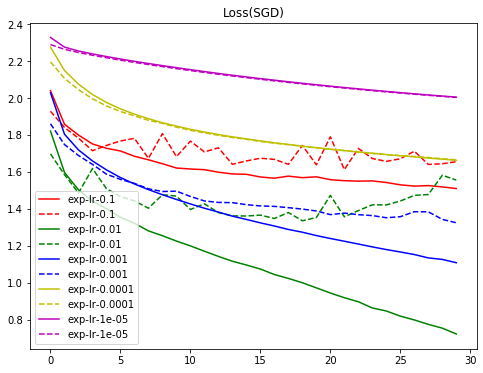

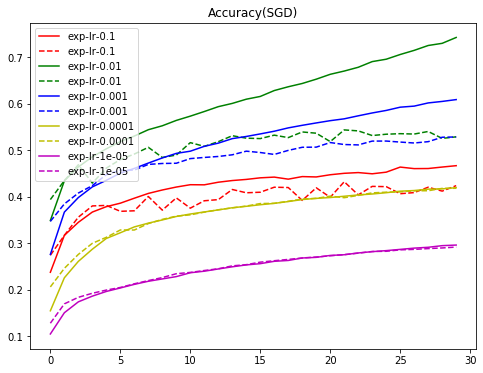

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss(SGD)")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy(SGD)")
plt.legend()
plt.show()

In [9]:
# optimizers.RMSprop
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [============================

Epoch 14/30
50000/50000 [==============================] - 7s 135us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/30
50000/50000 [==============================] - 7s 134us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/30
50000/50000 [==============================] - 7s 134us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/30
50000/50000 [==============================] - 7s 133us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/30
50000/50000 [==============================] - 7s 134us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/30
50000/50000 [==============================] - 7s 133us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/30
50000/50000 [==============================] - 7s 133us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/30
5

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 7s 137us/step - loss: 1.9627 - acc: 0.2878 - val_loss: 1.8979 - val_acc: 0.3038
Epoch 2/30
50000/50000 [==============================] - 7s 131us/step - loss: 1.7909 - acc: 0.3631 - val_loss: 1.7440 - val_acc: 0.3825
Epoch 3/30
50000/50000 [==============================] - 7s 132us/step - loss: 1.7129 - acc: 0.3921 - val_loss: 1.7137 - val_acc: 0.3873
Epoch 4/30
50000/50000 [==============================] - 7s 131us/step - loss: 1.6567 - acc: 0.4118 - val_loss: 1.6722 - val_acc: 0.4052
Epoch 5/30
50000/50000 [==============================] - 7s 131us/step - loss: 1.6158 - acc: 0.4281 - val_loss: 1.6152 - val_acc: 0.4183
Epoch 6/30
50000/50000 [==============================] - 7s 131us/step - loss: 1.5794 - acc: 0.4408 - val_loss: 1.5853 - val_acc: 0.4366
Epoch 7/30
50000/50000 [==============================] - 7s 132us/step - loss: 1.5468 - acc: 0.4541 - val_loss: 1.5892 - 

Epoch 22/30
50000/50000 [==============================] - 6s 129us/step - loss: 1.5603 - acc: 0.4596 - val_loss: 1.5743 - val_acc: 0.4520
Epoch 23/30
50000/50000 [==============================] - 6s 130us/step - loss: 1.5523 - acc: 0.4632 - val_loss: 1.5765 - val_acc: 0.4488
Epoch 24/30
50000/50000 [==============================] - 6s 129us/step - loss: 1.5452 - acc: 0.4648 - val_loss: 1.5816 - val_acc: 0.4455
Epoch 25/30
50000/50000 [==============================] - 6s 129us/step - loss: 1.5378 - acc: 0.4685 - val_loss: 1.5627 - val_acc: 0.4501
Epoch 26/30
50000/50000 [==============================] - 6s 130us/step - loss: 1.5304 - acc: 0.4695 - val_loss: 1.5588 - val_acc: 0.4552
Epoch 27/30
50000/50000 [==============================] - 6s 130us/step - loss: 1.5246 - acc: 0.4720 - val_loss: 1.5480 - val_acc: 0.4557
Epoch 28/30
50000/50000 [==============================] - 6s 130us/step - loss: 1.5177 - acc: 0.4759 - val_loss: 1.5448 - val_acc: 0.4598
Epoch 29/30
50000/50000 [==

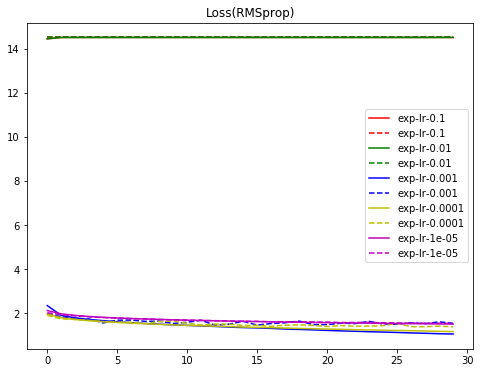

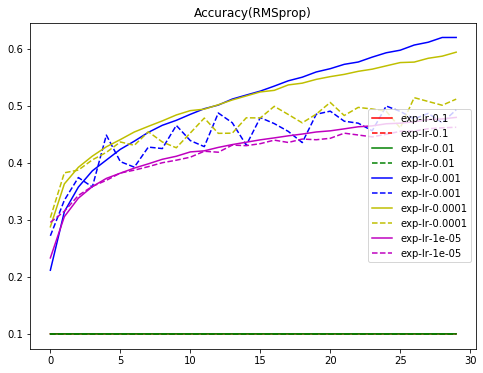

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss(RMSprop)")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy(RMSprop)")
plt.legend()
plt.show()

In [11]:
# optimizers.AdaGrad
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [============================

50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/30
50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/30
50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/30
50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/30
50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/30
50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/30
50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/30
50000/50000 [

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 7s 133us/step - loss: 2.0491 - acc: 0.2772 - val_loss: 1.9666 - val_acc: 0.3091
Epoch 2/30
50000/50000 [==============================] - 6s 125us/step - loss: 1.9334 - acc: 0.3275 - val_loss: 1.9065 - val_acc: 0.3370
Epoch 3/30
50000/50000 [==============================] - 6s 125us/step - loss: 1.8881 - acc: 0.3424 - val_loss: 1.8722 - val_acc: 0.3462
Epoch 4/30
50000/50000 [==============================] - 6s 126us/step - loss: 1.8600 - acc: 0.3540 - val_loss: 1.8501 - val_acc: 0.3498
Epoch 5/30
50000/50000 [==============================] - 6s 126us/step - loss: 1.8398 - acc: 0.3601 - val_loss: 1.8331 - val_acc: 0.3567
Epoch 6/30
50000/50000 [==============================] - 6s 126us/step - loss: 1.8240 - acc: 0.3656 - val_loss: 1.8197 - val_acc: 0.3628
Epoch 7/30
50000/50000 [==============================] - 6s 126us/step - loss: 1.8111 - acc: 0.3703 - val_loss: 1.8086 - 

Epoch 22/30
50000/50000 [==============================] - 6s 126us/step - loss: 2.0465 - acc: 0.2727 - val_loss: 2.0460 - val_acc: 0.2719
Epoch 23/30
50000/50000 [==============================] - 6s 125us/step - loss: 2.0430 - acc: 0.2753 - val_loss: 2.0427 - val_acc: 0.2732
Epoch 24/30
50000/50000 [==============================] - 6s 125us/step - loss: 2.0397 - acc: 0.2765 - val_loss: 2.0396 - val_acc: 0.2750
Epoch 25/30
50000/50000 [==============================] - 6s 125us/step - loss: 2.0366 - acc: 0.2779 - val_loss: 2.0366 - val_acc: 0.2763
Epoch 26/30
50000/50000 [==============================] - 6s 125us/step - loss: 2.0336 - acc: 0.2792 - val_loss: 2.0337 - val_acc: 0.2787
Epoch 27/30
50000/50000 [==============================] - 6s 125us/step - loss: 2.0308 - acc: 0.2810 - val_loss: 2.0310 - val_acc: 0.2802
Epoch 28/30
50000/50000 [==============================] - 6s 125us/step - loss: 2.0280 - acc: 0.2826 - val_loss: 2.0283 - val_acc: 0.2810
Epoch 29/30
50000/50000 [==

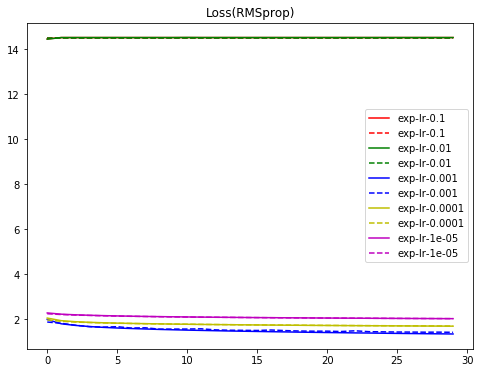

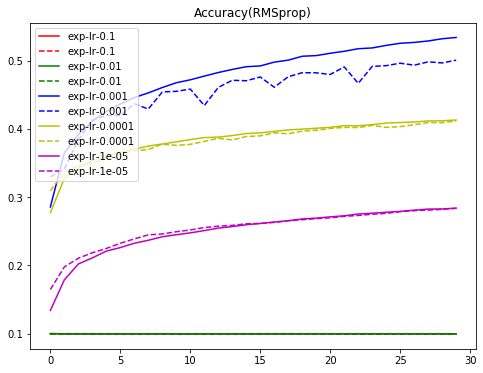

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss(RMSprop)")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy(RMSprop)")
plt.legend()
plt.show()

In [13]:
# optimizers.Adam
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [============================

Epoch 14/30
50000/50000 [==============================] - 8s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/30
50000/50000 [==============================] - 7s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/30
50000/50000 [==============================] - 8s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/30
50000/50000 [==============================] - 8s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/30
50000/50000 [==============================] - 8s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/30
50000/50000 [==============================] - 8s 151us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/30
50000/50000 [==============================] - 8s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/30
5

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 20s 408us/step - loss: 1.9082 - acc: 0.3198 - val_loss: 1.7653 - val_acc: 0.3726
Epoch 2/30
50000/50000 [==============================] - 8s 167us/step - loss: 1.7130 - acc: 0.3964 - val_loss: 1.6783 - val_acc: 0.4020
Epoch 3/30
50000/50000 [==============================] - 8s 158us/step - loss: 1.6300 - acc: 0.4251 - val_loss: 1.6212 - val_acc: 0.4218
Epoch 4/30
50000/50000 [==============================] - 8s 153us/step - loss: 1.5753 - acc: 0.4427 - val_loss: 1.5523 - val_acc: 0.4487
Epoch 5/30
50000/50000 [==============================] - 8s 150us/step - loss: 1.5333 - acc: 0.4583 - val_loss: 1.5426 - val_acc: 0.4550
Epoch 6/30
50000/50000 [==============================] - 8s 151us/step - loss: 1.4993 - acc: 0.4713 - val_loss: 1.5266 - val_acc: 0.4542
Epoch 7/30
50000/50000 [==============================] - 8s 150us/step - loss: 1.4610 - acc: 0.4847 - val_loss: 1.4661 -

Epoch 22/30
50000/50000 [==============================] - 7s 150us/step - loss: 1.5314 - acc: 0.4685 - val_loss: 1.5555 - val_acc: 0.4592
Epoch 23/30
50000/50000 [==============================] - 7s 149us/step - loss: 1.5238 - acc: 0.4702 - val_loss: 1.5466 - val_acc: 0.4608
Epoch 24/30
50000/50000 [==============================] - 8s 152us/step - loss: 1.5155 - acc: 0.4737 - val_loss: 1.5433 - val_acc: 0.4641
Epoch 25/30
50000/50000 [==============================] - 24s 479us/step - loss: 1.5088 - acc: 0.4773 - val_loss: 1.5390 - val_acc: 0.4619
Epoch 26/30
50000/50000 [==============================] - 9s 172us/step - loss: 1.5031 - acc: 0.4789 - val_loss: 1.5330 - val_acc: 0.4660
Epoch 27/30
50000/50000 [==============================] - 8s 158us/step - loss: 1.4950 - acc: 0.4814 - val_loss: 1.5255 - val_acc: 0.4663
Epoch 28/30
50000/50000 [==============================] - 8s 154us/step - loss: 1.4895 - acc: 0.4839 - val_loss: 1.5201 - val_acc: 0.4700
Epoch 29/30
50000/50000 [=

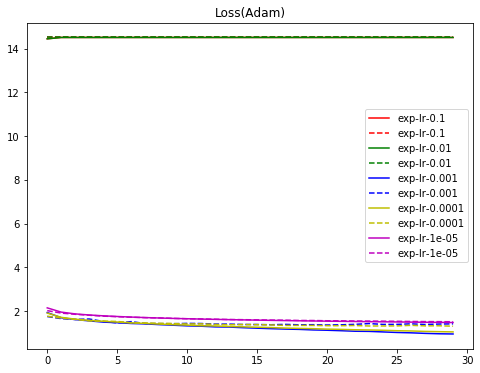

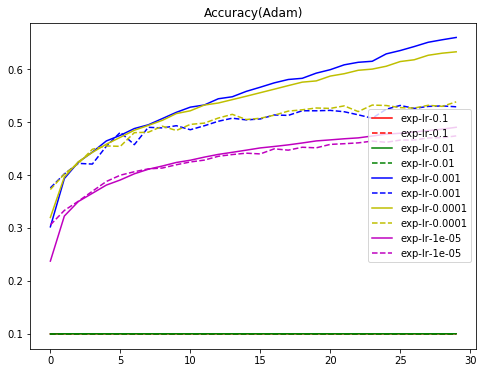

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss(Adam)")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy(Adam)")
plt.legend()
plt.show()